###Validation

In [ ]:
#code for runtime measurement
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.2 MB/s 


In [ ]:
%load_ext autotime

time: 489 µs (started: 2022-12-06 22:10:33 +00:00)


In [ ]:
import os 
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/Shareddrives/Data 245 - ML project")

Mounted at /content/gdrive
time: 19.3 s (started: 2022-12-06 22:10:41 +00:00)


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from nltk import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
import numpy as np
svc=SVC(probability=True, kernel='linear')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


time: 3.06 s (started: 2022-12-06 22:11:01 +00:00)


In [ ]:
import pandas as pd
#Copy Merged file to local google colab storage
!gdown --id 10mI70Ga8XgXgoQyMhVU2e7hsxNDOEytU

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=10mI70Ga8XgXgoQyMhVU2e7hsxNDOEytU 

time: 821 ms (started: 2022-12-06 22:11:04 +00:00)


In [ ]:
yelp=pd.read_csv('review_merge.csv')
yelp=yelp.drop(columns=['Unnamed: 0'])


time: 7.48 s (started: 2022-12-06 22:11:05 +00:00)


In [ ]:
yelp['year']=pd.to_numeric(yelp.date.str.slice(0,4))
yelp['year'].describe()

count    130445.000000
mean       2016.514401
std           3.279343
min        2005.000000
25%        2014.000000
50%        2017.000000
75%        2019.000000
max        2022.000000
Name: year, dtype: float64

time: 154 ms (started: 2022-12-06 22:11:12 +00:00)


In [ ]:
yelp=yelp[yelp['year']==2019]

time: 15.4 ms (started: 2022-12-06 22:11:12 +00:00)


In [ ]:
def func(x):
  if x<=3.5:
    return(0)

  else:
    return(1)
yelp['sentiment']=yelp['stars_y'].apply(func)
yelp

<ipython-input-13-aac8538689d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp['sentiment']=yelp['stars_y'].apply(func)


,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,attributes,categories,year,sentiment
288,BT5bVY11J9tnNCfPNbULuA,Op9pG0g6UfA9Uqy6r31LLg,gebiRewfieSdtt17PTW6Zg,5.0,0,0,0,"Great food! We had steak and calamari, it come...",2019-07-18 02:55:33,Hibachi Steak House & Sushi Bar,...,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",2019,0
313,fD43VuZYNP21u9DMMsCTaw,22dC3f5HOLA3tIN_ynjt3g,gebiRewfieSdtt17PTW6Zg,5.0,0,0,0,"We love this place, great prices and the cooks...",2019-03-10 23:05:31,Hibachi Steak House & Sushi Bar,...,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",2019,0
314,x6dRaSyg-hnbPTxRSRupsw,4bpsuNGWT7xpzdiQptnytQ,gebiRewfieSdtt17PTW6Zg,2.0,0,0,0,They definitely treat birthdays different. Sho...,2019-05-26 03:47:39,Hibachi Steak House & Sushi Bar,...,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",2019,0
323,h5NoP5mWY9q8W4Mfu_hOEw,n_yTFvV8OMTl1Ke-yIqnWA,gebiRewfieSdtt17PTW6Zg,1.0,0,0,0,Went from being regulars from once to twice a ...,2019-12-17 00:40:45,Hibachi Steak House & Sushi Bar,...,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",2019,0
327,UlUNNTuN-GcQ7058c_j6bg,t4q5uNcoKllb1qPG5Wow4A,gebiRewfieSdtt17PTW6Zg,4.0,0,0,0,"If you like Benihana, then you will like the H...",2019-11-28 16:40:27,Hibachi Steak House & Sushi Bar,...,CA,93101,34.416984,-119.695556,3.5,488,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130348,iI3lDywUvUpsDeq8ed9fdQ,FOq9BD5OPDHxbxTL1ESTLA,bVaRZDHkWdsHuARGxxpREw,5.0,2,0,0,A new location for Yume Sushi. Finally they f...,2019-12-01 04:44:49,Sushi Bar 29,...,CA,93101,34.422291,-119.705339,4.5,97,"{'WiFi': ""u'no'"", 'RestaurantsTableService': '...","Japanese, Restaurants, Noodles, Sushi Bars",2019,1
130351,DlPIs6nPuO7m09vrx2mB6g,4V5-wggNEUTUdH2W4qQO4Q,bVaRZDHkWdsHuARGxxpREw,5.0,3,0,3,The new location for Yume sushi is great! New ...,2019-12-16 21:23:07,Sushi Bar 29,...,CA,93101,34.422291,-119.705339,4.5,97,"{'WiFi': ""u'no'"", 'RestaurantsTableService': '...","Japanese, Restaurants, Noodles, Sushi Bars",2019,1
130353,QRDVMu39JyfFLPPfFS6M9g,X5nfGpSgyKR09-8odI5Z4Q,bVaRZDHkWdsHuARGxxpREw,5.0,2,0,0,"Same amazing sushi, different place. Dining in...",2019-12-12 02:03:11,Sushi Bar 29,...,CA,93101,34.422291,-119.705339,4.5,97,"{'WiFi': ""u'no'"", 'RestaurantsTableService': '...","Japanese, Restaurants, Noodles, Sushi Bars",2019,1
130377,hz54U-iDvUb971zwBe3fwA,uD2SHWodLi0M7qdXB2B5oQ,bVaRZDHkWdsHuARGxxpREw,5.0,2,0,0,What a great place. Love the green iced tea. S...,2019-12-14 00:17:12,Sushi Bar 29,...,CA,93101,34.422291,-119.705339,4.5,97,"{'WiFi': ""u'no'"", 'RestaurantsTableService': '...","Japanese, Restaurants, Noodles, Sushi Bars",2019,1


time: 60.5 ms (started: 2022-12-06 22:11:12 +00:00)


In [ ]:
new=yelp[['text','sentiment']].copy()
new

,text,sentiment
288,"Great food! We had steak and calamari, it come...",0
313,"We love this place, great prices and the cooks...",0
314,They definitely treat birthdays different. Sho...,0
323,Went from being regulars from once to twice a ...,0
327,"If you like Benihana, then you will like the H...",0
...,...,...
130348,A new location for Yume Sushi. Finally they f...,1
130351,The new location for Yume sushi is great! New ...,1
130353,"Same amazing sushi, different place. Dining in...",1
130377,What a great place. Love the green iced tea. S...,1


time: 23.1 ms (started: 2022-12-06 22:51:20 +00:00)


In [ ]:
import re
new=new.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')) #Remove emojis 

time: 71.2 ms (started: 2022-12-06 22:51:22 +00:00)


In [ ]:
new['text'] = new['text'].apply(lambda x: re.split('<a href="https:\/\/.*', str(x))[0]) #Remove URLs

time: 43.5 ms (started: 2022-12-06 22:51:22 +00:00)


In [ ]:
def process_content(content): #Remove special characters
    return " ".join(re.findall("[A-Za-z]+",content))
new['text'] = new['text'].apply(process_content)
new

,text,sentiment
288,Great food We had steak and calamari it comes ...,0
313,We love this place great prices and the cooks ...,0
314,They definitely treat birthdays different Shou...,0
323,Went from being regulars from once to twice a ...,0
327,If you like Benihana then you will like the Hi...,0
...,...,...
130348,A new location for Yume Sushi Finally they fou...,1
130351,The new location for Yume sushi is great New l...,1
130353,Same amazing sushi different place Dining in o...,1
130377,What a great place Love the green iced tea Sas...,1


time: 322 ms (started: 2022-12-06 22:51:23 +00:00)


In [ ]:
new['text'] = new['text'].str.lower()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


time: 25.1 ms (started: 2022-12-06 22:51:26 +00:00)


In [ ]:
new['Tokenized'] = new['text'].apply(lemmatize_text)


time: 5.31 s (started: 2022-12-06 22:51:28 +00:00)


In [ ]:
def remove_stop_words(tokenized_list):
  filtered_sentence=[]
  for w in tokenized_list:
    if w not in stop_words:
        filtered_sentence.append(w)
  return filtered_sentence
#stop word
stop_words = set(stopwords.words('english'))
new['Tokenized'] = new.Tokenized.apply(lambda x: remove_stop_words(x))

new

,text,sentiment,Tokenized
288,great food we had steak and calamari it comes ...,0,"[great, food, steak, calamari, come, salad, fr..."
313,we love this place great prices and the cooks ...,0,"[love, place, great, price, cook, amazing, spe..."
314,they definitely treat birthdays different shou...,0,"[definitely, treat, birthday, different, think..."
323,went from being regulars from once to twice a ...,0,"[went, regular, twice, week, going, anymore, d..."
327,if you like benihana then you will like the hi...,0,"[like, benihana, like, hibachi, steak, house, ..."
...,...,...,...
130348,a new location for yume sushi finally they fou...,1,"[new, location, yume, sushi, finally, found, n..."
130351,the new location for yume sushi is great new l...,1,"[new, location, yume, sushi, great, new, locat..."
130353,same amazing sushi different place dining in o...,1,"[amazing, sushi, different, place, dining, eve..."
130377,what a great place love the green iced tea sas...,1,"[great, place, love, green, iced, tea, sashimi..."


time: 199 ms (started: 2022-12-06 22:51:35 +00:00)


In [ ]:
new['word_count'] = new.Tokenized.apply(lambda x: len(x))
print(new.word_count.describe())
print(new.info())

count    14914.000000
mean        45.274574
std         39.967512
min          0.000000
25%         20.000000
50%         33.000000
75%         57.000000
max        473.000000
Name: word_count, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14914 entries, 288 to 130428
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        14914 non-null  object
 1   sentiment   14914 non-null  object
 2   Tokenized   14914 non-null  object
 3   word_count  14914 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 582.6+ KB
None
time: 31.1 ms (started: 2022-12-06 22:51:48 +00:00)


count    14914.000000
mean        45.274574
std         39.967512
min          0.000000
25%         20.000000
50%         33.000000
75%         57.000000
max        473.000000
Name: word_count, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6abce13ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6abd1023a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6abce13940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6abd102a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6abd102d60>],
 'means': []}

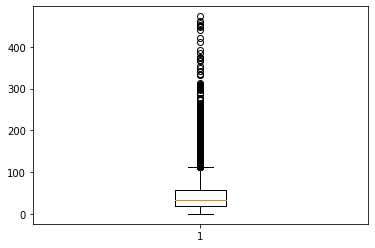

time: 146 ms (started: 2022-12-06 22:51:50 +00:00)


In [ ]:
print(new.word_count.describe())
import matplotlib.pyplot as plt
plt.boxplot(new['word_count'])

In [ ]:
new = new[new.word_count >= 3].reset_index(drop=True)

time: 6.57 ms (started: 2022-12-06 22:51:52 +00:00)


count    14907.000000
mean        45.295700
std         39.964999
min          3.000000
25%         20.000000
50%         33.000000
75%         57.000000
max        473.000000
Name: word_count, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7864349290>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7864346310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f786434ac50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7864347790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7864345a10>],
 'means': []}

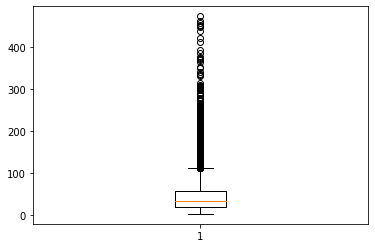

time: 152 ms (started: 2022-11-30 06:54:13 +00:00)


In [ ]:
print(new.word_count.describe())
import matplotlib.pyplot as plt
plt.boxplot(new['word_count'])

In [ ]:
Y=new['sentiment']


time: 1.72 ms (started: 2022-12-06 22:51:56 +00:00)


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# anx_df = new.loc[new['sentiment'] == 1]
anx_text2 = new.text.values
new.Tokenized

0        [great, food, steak, calamari, come, salad, fr...
1        [love, place, great, price, cook, amazing, spe...
2        [definitely, treat, birthday, different, think...
3        [went, regular, twice, week, going, anymore, d...
4        [like, benihana, like, hibachi, steak, house, ...
                               ...                        
14902    [new, location, yume, sushi, finally, found, n...
14903    [new, location, yume, sushi, great, new, locat...
14904    [amazing, sushi, different, place, dining, eve...
14905    [great, place, love, green, iced, tea, sashimi...
14906    [yume, sushi, relocated, hand, favorite, sushi...
Name: Tokenized, Length: 14907, dtype: object

time: 16.6 ms (started: 2022-12-06 22:53:01 +00:00)


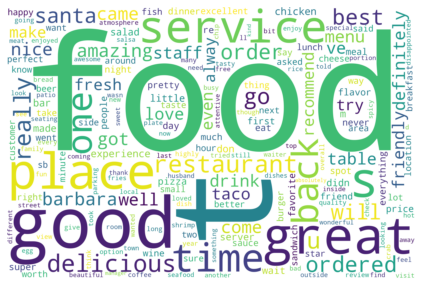

time: 22.2 s (started: 2022-12-06 22:36:21 +00:00)


In [ ]:
text = " ".join(review for review in anx_text)
word_cloud = WordCloud( width = 3000,height =2000,collocations = False, background_color = 'white').generate(text)
fig = plt.figure(figsize = (10,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


---
#Vectorize Code using TFIDF
---

In [ ]:
vectorizer = TfidfVectorizer(analyzer=lambda x:x)
vectors = vectorizer.fit_transform(new['Tokenized'])
feature_names = vectorizer.get_feature_names()
sparse_df = pd.DataFrame.sparse.from_spmatrix(vectors)
print(sparse_df.shape)
sparse_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(14907, 19147)


,0,1,2,3,4,5,6,7,8,9,...,19137,19138,19139,19140,19141,19142,19143,19144,19145,19146
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 2.66 s (started: 2022-12-06 22:11:27 +00:00)


In [ ]:
vectors.shape

(14907, 19147)

time: 14 ms (started: 2022-12-06 22:20:57 +00:00)


In [ ]:
dense = vectors.toarray()
X_Vectorized = pd.DataFrame(dense, columns=feature_names)

time: 3.69 s (started: 2022-12-06 22:22:36 +00:00)


In [ ]:
X_Vectorized

,aa,aaa,aaaaaand,aaammaaaaazzinngg,aaand,aai,aamazing,aar,aaron,aback,...,zorries,zu,zucchini,zuchini,zuppa,zur,zwar,zwischenzeitlich,zyrtec,zza
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 132 ms (started: 2022-12-06 22:22:41 +00:00)


# PCA 



In [ ]:
# step-1 importing libraries
#basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#text analytics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

time: 2.02 ms (started: 2022-11-30 09:03:53 +00:00)


In [ ]:
# step-4 reduce the dimension of data using PCA/SVD 16
pca = PCA(n_components = 30)  
df_pca = pca.fit_transform(X_Vectorized)
#this is dimensionality reduced df
df_pca=pd.DataFrame(df_pca)

time: 34.2 s (started: 2022-11-30 02:09:41 +00:00)


In [ ]:
# step-4 reduce the dimension of data using PCA/SVD 16
pca = PCA(n_components = 2000)  
df_pca = pca.fit_transform(X_Vectorized)
#this is dimensionality reduced df
df_pca=pd.DataFrame(df_pca)

time: 6min 50s (started: 2022-11-30 09:04:32 +00:00)


Text(0.5, 1.0, 'scree plot')

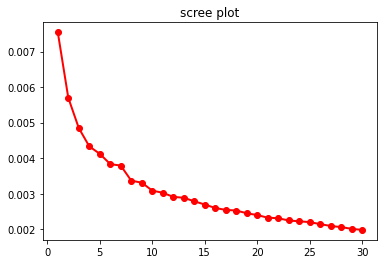

time: 356 ms (started: 2022-11-30 02:10:20 +00:00)


In [ ]:
# step-5 plotting scree/eigen value plot
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('scree plot')

In [ ]:
np.cumsum(pca.explained_variance_)[pca.n_components_-1]

0.7623311658413042

time: 7.69 ms (started: 2022-11-30 09:15:49 +00:00)


In [ ]:
Y=new['sentiment']
X1_train, X1_test,y1_train, y1_test = train_test_split(df_pca, Y, test_size = .2, random_state=42)

time: 770 ms (started: 2022-11-30 09:15:54 +00:00)


In [ ]:
# model evaluation on tsvd
def model_selected(model_name):
  if model_name == 'XGBClassifier':
    model = XGBClassifier(n_estimators=100)
  elif model_name == 'SVC':
    model = svm.SVC(kernel='linear')
  elif model_name == 'RandomForestClassifier':
    model = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators = 100, random_state=1)
  else:
    print("Invalid Model Name!! Please give a proper model name!")
  return model

time: 1.95 ms (started: 2022-11-30 09:16:00 +00:00)


In [ ]:
def model_train(model_name,X_train,y_train,X_test,y_test):

  model = model_selected(model_name)

  train_fit = model.fit(X_train, y_train)
  #Evaluating the model on the test dataset
  model_score = model.score(X_test, y_test)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = (np.sqrt(mean_squared_error(y_test, pred)))
  r2 = r2_score(y_test, pred)
  acc = (metrics.accuracy_score(y_test, pred)*100)
  print('\033[1m')
  print(f"Testing Performance Metrics for the {model_name} :")
  print('\033[0m')
  print("      Mean Squared Error (MSE): {:.2f}".format(mse))
  print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
  print("                      Accuracy: {:.2f}".format(acc) + '%')

time: 3.59 ms (started: 2022-11-30 09:16:01 +00:00)


In [ ]:
model_train('XGBClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the XGBClassifier :

      Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.42
                      Accuracy: 82.49%
time: 2min 27s (started: 2022-11-30 09:16:13 +00:00)


In [ ]:
model_train('SVC',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the SVC :

      Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.39
                      Accuracy: 84.74%
time: 2min 36s (started: 2022-11-30 09:18:40 +00:00)


In [ ]:
model_train('RandomForestClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the RandomForestClassifier :

      Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.42
                      Accuracy: 81.96%
time: 39.2 s (started: 2022-11-30 09:21:17 +00:00)


In [ ]:
# step-4 reduce the dimension of data using PCA/SVD 16
pca = PCA(n_components = 60)  
df_pca = pca.fit_transform(X_Vectorized)
#this is dimensionality reduced df
df_pca=pd.DataFrame(df_pca)

time: 54.1 s (started: 2022-11-30 01:14:31 +00:00)


Text(0.5, 1.0, 'scree plot')

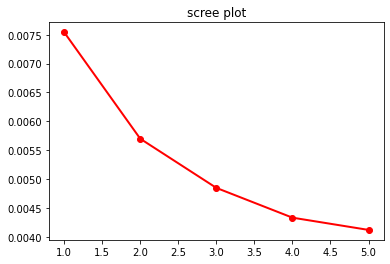

time: 334 ms (started: 2022-11-30 02:08:46 +00:00)


In [ ]:
# step-5 plotting scree/eigen value plot
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('scree plot')

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[pca.n_components_-1]

0.14860412324236416

time: 17.1 ms (started: 2022-11-30 01:16:49 +00:00)


In [ ]:
model_train('XGBClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the XGBClassifier :

      Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
                      Accuracy: 83.37%
time: 4.07 s (started: 2022-11-30 01:17:06 +00:00)


In [ ]:
# step-4 reduce the dimension of data using PCA/SVD 16
pca = PCA(n_components = 600)  
df_pca = pca.fit_transform(X_Vectorized)
#this is dimensionality reduced df
df_pca=pd.DataFrame(df_pca)

time: 3min 32s (started: 2022-11-30 02:33:49 +00:00)


Text(0.5, 1.0, 'scree plot')

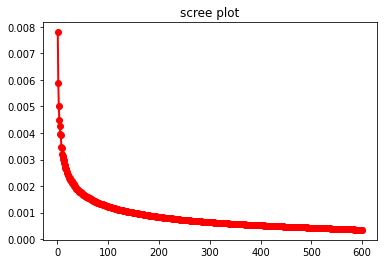

time: 611 ms (started: 2022-11-30 02:37:55 +00:00)


In [ ]:
# step-5 plotting scree/eigen value plot
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('scree plot')

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[pca.n_components_-1]

0.5222716146636185

time: 9.21 ms (started: 2022-11-30 02:37:58 +00:00)


In [ ]:
model_train('XGBClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the XGBClassifier :

      Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.42
                      Accuracy: 82.77%
time: 2.74 s (started: 2022-11-30 02:38:01 +00:00)


In [ ]:
model_train('RandomForestClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the RandomForestClassifier :

      Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
                      Accuracy: 83.17%
time: 6.47 s (started: 2022-11-30 01:36:38 +00:00)


In [ ]:
# step-4 reduce the dimension of data using PCA/SVD 16
pca = PCA(n_components = 1000)  
df_pca = pca.fit_transform(X_Vectorized)
#this is dimensionality reduced df
df_pca=pd.DataFrame(df_pca)

time: 5min 51s (started: 2022-11-30 01:38:26 +00:00)


In [ ]:
np.cumsum(pca.explained_variance_ratio_)[pca.n_components_-1]

0.6384675744434221

time: 7.46 ms (started: 2022-11-30 01:50:26 +00:00)


In [ ]:
model_train('RandomForestClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the RandomForestClassifier :

      Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
                      Accuracy: 83.17%
time: 7.79 s (started: 2022-11-30 01:50:44 +00:00)


In [ ]:
# step-4 reduce the dimension of data using PCA/SVD 16
pca = PCA(n_components = 2000)  
df_pca = pca.fit_transform(X_Vectorized)
#this is dimensionality reduced df
df_pca=pd.DataFrame(df_pca)

time: 8min 6s (started: 2022-11-30 02:38:26 +00:00)


In [ ]:
np.cumsum(pca.explained_variance_ratio_)[pca.n_components_-1]

0.7877753793272835

time: 5.36 ms (started: 2022-11-30 02:46:38 +00:00)


#SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD 
# Using 30 components to perform T SVD
truncatedSVD=TruncatedSVD(30)
X_truncated = truncatedSVD.fit_transform(sparse_df)
X_truncated[:3] 

KeyboardInterrupt: ignored

time: 8.27 s (started: 2022-11-30 06:55:05 +00:00)


In [ ]:
from sklearn.decomposition import TruncatedSVD 
# Using 2000 components to perform T SVD
truncatedSVD=TruncatedSVD(600)
X_truncated = truncatedSVD.fit_transform(sparse_df)
X_truncated[:3] 

array([[ 0.12638356,  0.05241432, -0.04953486, ..., -0.02562669,
        -0.00397926, -0.01444885],
       [ 0.14022864,  0.10811849, -0.03095445, ..., -0.02106915,
        -0.03452555, -0.02576319],
       [ 0.06949567, -0.01693897,  0.01766422, ...,  0.00250637,
        -0.0009701 ,  0.00168502]])

time: 25.8 s (started: 2022-11-30 08:08:43 +00:00)


In [ ]:
np.cumsum(truncatedSVD.explained_variance_ratio_)

array([0.00431941, 0.01141553, 0.01678582, ..., 0.78860902, 0.78869966,
       0.78879007])

time: 23.2 ms (started: 2022-11-30 08:32:42 +00:00)


In [ ]:
Y=new['sentiment']
X1_train, X1_test,y1_train, y1_test = train_test_split(X_truncated, Y, test_size = .2, random_state=0)

time: 68.6 ms (started: 2022-11-30 06:57:15 +00:00)


In [ ]:
# model evaluation on tsvd
def model_selected(model_name):
  if model_name == 'XGBClassifier':
    model = XGBClassifier(n_estimators=100)
  elif model_name == 'SVC':
    model = svm.SVC(kernel='linear')
  elif model_name == 'RandomForestClassifier':
    model = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators = 100, random_state=1)
  else:
    print("Invalid Model Name!! Please give a proper model name!")
  return model

time: 2.49 ms (started: 2022-11-30 06:57:19 +00:00)


In [ ]:
def model_train(model_name,X_train,y_train,X_test,y_test):

  model = model_selected(model_name)

  train_fit = model.fit(X_train, y_train)
  #Evaluating the model on the test dataset
  model_score = model.score(X_test, y_test)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = (np.sqrt(mean_squared_error(y_test, pred)))
  r2 = r2_score(y_test, pred)
  acc = (metrics.accuracy_score(y_test, pred)*100)
  print('\033[1m')
  print(f"Testing Performance Metrics for the {model_name} :")
  print('\033[0m')
  print("      Mean Squared Error (MSE): {:.2f}".format(mse))
  print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
  print("                      Accuracy: {:.2f}".format(acc) + '%')

time: 2.03 ms (started: 2022-11-30 06:57:21 +00:00)


visualize the original and predicted test data in a plot to compare visually.

In [ ]:
import numpy as np

time: 923 µs (started: 2022-11-30 06:57:26 +00:00)


In [ ]:
model_train('XGBClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the XGBClassifier :

      Mean Squared Error (MSE): 0.16
Root Mean Squared Error (RMSE): 0.40
                      Accuracy: 83.97%
time: 2min 36s (started: 2022-11-30 06:57:36 +00:00)


In [ ]:
model_train('RandomForestClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the RandomForestClassifier :

      Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
                      Accuracy: 83.17%
time: 4.08 s (started: 2022-11-27 03:26:38 +00:00)


In [ ]:
model_train('SVC',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the SVC :

      Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
                      Accuracy: 83.17%
time: 3.68 s (started: 2022-11-27 03:26:42 +00:00)


#Hyper Parameter Tuning

In [ ]:
# Hyper parameter tuning for SVC using RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [ ]:
Y=new['sentiment']
X1_train, X1_test,y1_train, y1_test = train_test_split(X_truncated, Y, test_size = .2, random_state=42)
y1_train

1891     1
2998     1
14077    0
4467     0
4048     1
        ..
5191     1
13418    1
5390     0
860      1
7270     1
Name: sentiment, Length: 11925, dtype: object

time: 79.4 ms (started: 2022-11-30 07:00:13 +00:00)


In [ ]:
#for pca
Y=new['sentiment']
X1_train, X1_test,y1_train, y1_test = train_test_split(df_pca, Y, test_size = .2, random_state=42)
y1_train

1891     1
2998     1
14077    0
4467     0
4048     1
        ..
5191     1
13418    1
5390     0
860      1
7270     1
Name: sentiment, Length: 11925, dtype: object

time: 730 ms (started: 2022-11-30 09:28:36 +00:00)


In [ ]:
# Hyper parameter tuning for SVC using RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter

clf = RandomizedSearchCV(svm.SVC(kernel='linear'), param_distributions,cv=10, random_state=0)
search = clf.fit(X1_train, y1_train)
search.best_params_

{'C': 6.4881350392732475, 'gamma': 0.026938830192854094}

time: 3min 34s (started: 2022-11-27 03:32:43 +00:00)


In [ ]:
#USING PCA

# Hyper parameter tuning for SVC using RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter

clf = RandomizedSearchCV(svm.SVC(kernel='linear'), param_distributions,cv=10, random_state=0)
search = clf.fit(X1_train, y1_train)
search.best_params_

In [ ]:
# Hyper parameter tuning for Random forest using RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 20, num = 20)] # number of trees in the random forest #100, 200, 300
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 10, cv = 5, verbose=2, random_state=35, n_jobs = -1)

time: 1.96 ms (started: 2022-11-27 03:37:01 +00:00)


In [ ]:
#USING PCA

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 10, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X1_train, y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19,
                                                         20]},
                   random_state=35, verbose=2)

time: 1min 7s (started: 2022-11-27 03:37:03 +00:00)


In [ ]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 17, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}  

time: 3.46 ms (started: 2022-11-27 03:39:15 +00:00)


In [ ]:
#Hyper parameter tuning for XGBoost using Randomized search cv

import xgboost
classifier = xgboost.XGBClassifier()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight' : [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

#model fitting
rs_model.fit(X1_train, y1_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

time: 51min 15s (started: 2022-11-30 07:01:41 +00:00)


In [ ]:
#USING PCA


#Hyper parameter tuning for XGBoost using Randomized search cv

import xgboost
classifier = xgboost.XGBClassifier()

params = {
'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
'min_child_weight' : [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

#model fitting
rs_model.fit(X1_train, y1_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

time: 51min 15s (started: 2022-11-30 07:01:41 +00:00)


In [ ]:
#USING PCA

#parameters selected
rs_model.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

time: 7.91 ms (started: 2022-11-30 08:11:51 +00:00)


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X1_train,y1_train,cv=10)
print(score)

KeyboardInterrupt: ignored

time: 45.7 s (started: 2022-11-30 08:12:26 +00:00)


In [ ]:
print(score)

[0.83165829 0.83067896 0.82984074 0.82984074 0.82900251 0.82145851
 0.82648785 0.82732607 0.82984074 0.82900251]
time: 4.39 ms (started: 2022-11-27 03:48:28 +00:00)


#Model evaluation after HPT FOR SVD

In [ ]:
#Models Definition:

# model evaluation on tf idf
def model_selected(model_name):
  if model_name == 'XGBClassifier':
    model = XGBClassifier(colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth= 6,min_child_weight= 5)
  elif model_name == 'SVC':
    model = svm.SVC(C= 6.488135, kernel='linear',gamma= 0.026938)
  elif model_name == 'RandomForestClassifier':
    model = RandomForestClassifier(criterion='entropy', n_estimators = 17, min_samples_split = 6, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 120, bootstrap=False)
  else:
    print("Invalid Model Name!! Please give a proper model name!")
  return model

time: 3.71 ms (started: 2022-11-30 08:13:14 +00:00)


In [ ]:
def model_train(model_name,X_train,y_train,X_test,y_test):

  model = model_selected(model_name)

  train_fit = model.fit(X_train, y_train)
  #Evaluating the model on the test dataset
  model_score = model.score(X_test, y_test)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = (np.sqrt(mean_squared_error(y_test, pred)))
  r2 = r2_score(y_test, pred)
  acc = (metrics.accuracy_score(y_test, pred)*100)
  print('\033[1m')
  print(f"Testing Performance Metrics for the {model_name} :")
  print('\033[0m')
  print("      Mean Squared Error (MSE): {:.2f}".format(mse))
  print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
  print("                      Accuracy: {:.2f}".format(acc) + '%')


time: 3.32 ms (started: 2022-11-30 08:13:17 +00:00)


In [ ]:
model_train('XGBClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the XGBClassifier :

      Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
                      Accuracy: 82.80%
time: 2min 7s (started: 2022-11-30 08:13:20 +00:00)


In [ ]:
model_train('RandomForestClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the RandomForestClassifier :

      Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
                      Accuracy: 82.87%
time: 3.13 s (started: 2022-11-27 04:06:29 +00:00)


In [ ]:
model_train('SVC',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the SVC :

      Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.42
                      Accuracy: 82.27%
time: 4.22 s (started: 2022-11-27 04:06:38 +00:00)


In [ ]:
#grid search, #xghpt meth #stackingensemble #votingensemble

#Trials

#Model evaluation after HPT FOR PCA

In [ ]:
#Models Definition:

# model evaluation on tf idf
def model_selected(model_name):
  if model_name == 'XGBClassifier':
    model = XGBClassifier(colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth= 6,min_child_weight= 5)
  elif model_name == 'SVC':
    model = svm.SVC(C= 6.488135, kernel='linear',gamma= 0.026938)
  elif model_name == 'RandomForestClassifier':
    model = RandomForestClassifier(criterion='entropy', n_estimators = 17, min_samples_split = 6, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 120, bootstrap=False)
  else:
    print("Invalid Model Name!! Please give a proper model name!")
  return model

time: 3.71 ms (started: 2022-11-30 08:13:14 +00:00)


In [ ]:
def model_train(model_name,X_train,y_train,X_test,y_test):

  model = model_selected(model_name)

  train_fit = model.fit(X_train, y_train)
  #Evaluating the model on the test dataset
  model_score = model.score(X_test, y_test)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = (np.sqrt(mean_squared_error(y_test, pred)))
  r2 = r2_score(y_test, pred)
  acc = (metrics.accuracy_score(y_test, pred)*100)
  print('\033[1m')
  print(f"Testing Performance Metrics for the {model_name} :")
  print('\033[0m')
  print("      Mean Squared Error (MSE): {:.2f}".format(mse))
  print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
  print("                      Accuracy: {:.2f}".format(acc) + '%')


time: 3.32 ms (started: 2022-11-30 08:13:17 +00:00)


In [ ]:
model_train('XGBClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the XGBClassifier :

      Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
                      Accuracy: 82.80%
time: 2min 7s (started: 2022-11-30 08:13:20 +00:00)


In [ ]:
model_train('RandomForestClassifier',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the RandomForestClassifier :

      Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
                      Accuracy: 82.87%
time: 3.13 s (started: 2022-11-27 04:06:29 +00:00)


In [ ]:
model_train('SVC',X1_train,y1_train,X1_test,y1_test)


Testing Performance Metrics for the SVC :

      Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.42
                      Accuracy: 82.27%
time: 4.22 s (started: 2022-11-27 04:06:38 +00:00)


In [ ]:
#grid search, #xghpt meth #stackingensemble #votingensemble

In [ ]:
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

time: 436 ms (started: 2022-11-27 06:23:07 +00:00)


In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X1_train, y1_train), ( X1_test, y1_test)]
    
    clf.fit(X1_train, y1_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X1_test)
    accuracy = accuracy_score(y1_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

time: 3.04 ms (started: 2022-11-27 06:23:40 +00:00)


In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]


TypeError: ignored

time: 268 ms (started: 2022-11-27 06:23:46 +00:00)
